In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd 

# Load data

In [10]:
deepstarr_plotdf = pd.read_csv('../figures/DeepSTARR_performance_curves_plotdf.csv')
residualbind_k562_plotdf = pd.read_csv(f'../results/distilled_lentiMPRA_epistemic/K562/distillation_performance_plotdata.csv')
residualbind_hepg2_plotdf = pd.read_csv(f'../results/distilled_lentiMPRA_epistemic/HepG2/distillation_performance_plotdata.csv')

# parse residualbind data to only show uncertainty
residualbind_k562_uncertainty = residualbind_k562_plotdf[residualbind_k562_plotdf['output']!='activity']
residualbind_hepg2_uncertainty = residualbind_hepg2_plotdf[residualbind_hepg2_plotdf['output']!='activity']


# change original -> individual
mapping = {'aleatoric': 'individual', 
           'aleatoric_average': 'ensemble', 
           'distilled': 'distilled'}
residualbind_k562_uncertainty['Model'] = residualbind_k562_uncertainty['label'].map(mapping)
residualbind_hepg2_uncertainty['Model'] = residualbind_hepg2_uncertainty['label'].map(mapping)


deepstarr_plotdf['Model'] = deepstarr_plotdf['label'].map(mapping)

/tmp/ipykernel_3398362/3652256349.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residualbind_k562_uncertainty['Model'] = residualbind_k562_uncertainty['label'].map(mapping)
/tmp/ipykernel_3398362/3652256349.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residualbind_hepg2_uncertainty['Model'] = residualbind_hepg2_uncertainty['label'].map(mapping)


In [11]:
residualbind_uncertainty = pd.concat([residualbind_k562_uncertainty, residualbind_hepg2_uncertainty])

# Plot

In [17]:
residualbind_uncertainty

,metric,model_ix,downsample,label,output,value,celltype,Model
166,Pearson,1.0,0.1,aleatoric,aleatoric,0.259478,K562,individual
167,Spearman,1.0,0.1,aleatoric,aleatoric,0.274204,K562,individual
168,MSE,2.0,0.1,aleatoric,aleatoric,0.022809,K562,individual
169,Pearson,2.0,0.1,aleatoric,aleatoric,0.241293,K562,individual
170,Spearman,2.0,0.1,aleatoric,aleatoric,0.270941,K562,individual
...,...,...,...,...,...,...,...,...
939,MSE,9.0,1.0,distilled,aleatoric,0.012128,HepG2,distilled
940,Spearman,9.0,1.0,distilled,aleatoric,0.102387,HepG2,distilled
941,Pearson,10.0,1.0,distilled,aleatoric,0.096533,HepG2,distilled
942,MSE,10.0,1.0,distilled,aleatoric,0.012149,HepG2,distilled


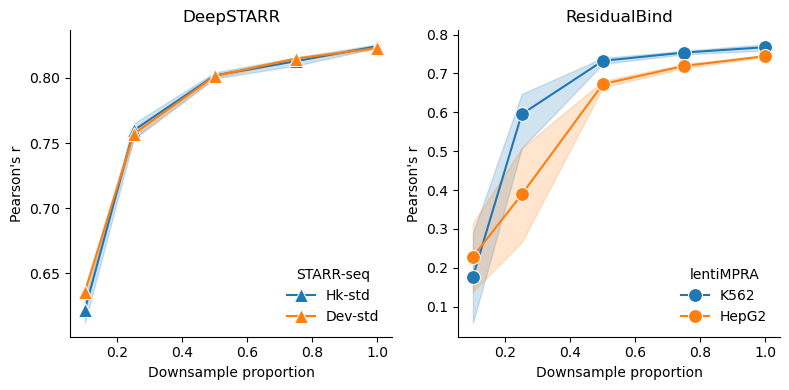

In [23]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

# palette = {'individual': 'tab:blue', 'distilled':'tab:orange', 'ensemble':'tab:green'}

# DeepSTARR
sns.lineplot(data=deepstarr_plotdf[(deepstarr_plotdf['output'].isin(['Dev-std', 'Hk-std'])) & (deepstarr_plotdf['metric']=='Pearson')], 
             hue='output', x='downsample', y='value', marker='^', markersize=10, ax=axs[0])
sns.lineplot(data=residualbind_uncertainty[(residualbind_uncertainty['metric']=='Pearson') & (residualbind_uncertainty['output']=='epistemic')], 
             x='downsample', y='value', hue='celltype', marker='o', markersize=10, ax=axs[1])

axs[0].set_title('DeepSTARR')
axs[1].set_title('ResidualBind')
axs[0].legend(title='STARR-seq', frameon=False, loc='lower right')
axs[1].legend(title='lentiMPRA', frameon=False, loc='lower right')

for ax in axs:
    ax.set_ylabel("Pearson's r")
    ax.set_xlabel('Downsample proportion')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
fig.tight_layout() 
fig.show()
fig.savefig('uncertainty_performance_curves.pdf')